Found 780 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


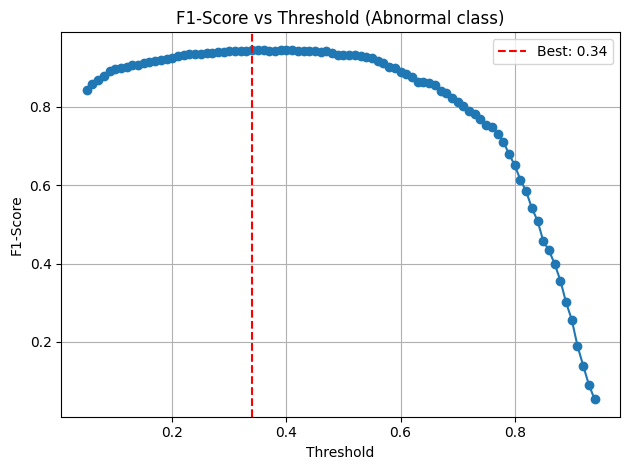


✅ Best Threshold: 0.34
Maximum F1-Score for 'Abnormal' class: 0.9457


In [2]:
# finding the best threasehold ::

import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt

# === Paths ===
model_path = r"C:\Users\Devansh\Desktop\Project Backups\Model3\LungAbnormalityDetectorThree_ModelResNet50.h5"
test_dir = r"C:\Users\Devansh\Desktop\Project Backups\LungAbnormalityDetectorDataset(PreprocessedAugmented)\Test"
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
class_names = ["Abnormal", "Normal"]

# === Load Model ===
model = tf.keras.models.load_model(model_path, compile=False)

# === Load Dataset ===
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# === Get True Labels and Probabilities ===
y_true = []
y_probs = []

for images, labels in test_ds:
    probs = model.predict(images).flatten()
    y_probs.extend(probs)
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_probs = np.array(y_probs)

# === Search Best Threshold ===
best_thresh = 0.5
best_f1 = 0.0
thresholds = np.arange(0.05, 0.95, 0.01)
f1_scores = []

for t in thresholds:
    preds = (y_probs > t).astype(int)
    f1 = f1_score(y_true, preds, pos_label=1)
    f1_scores.append(f1)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

# === Plot F1 vs Threshold ===
plt.plot(thresholds, f1_scores, marker='o')
plt.title("F1-Score vs Threshold (Abnormal class)")
plt.xlabel("Threshold")
plt.ylabel("F1-Score")
plt.grid(True)
plt.axvline(best_thresh, color='r', linestyle='--', label=f'Best: {best_thresh:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# === Print Best Threshold ===
print(f"\n✅ Best Threshold: {best_thresh:.2f}")
print(f"Maximum F1-Score for 'Abnormal' class: {best_f1:.4f}")

Found 780 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step
Abnormal-1.png                 → Predicted: Normal
Abnormal-10.png                → Predicted: Abnormal
Abnormal-100.png               → Predicted: Abnormal
Abnormal-101.png               → Predicted: Normal
Abnormal-102.png               → Predicted: Abnormal
Abnormal-103.png               → Predicted: Abnormal
Abnormal-104.png               → Predicted: Abnormal
Abnormal-105.png               → Predicted: Abnormal
Abnormal-106.png               → Predicted: Abnormal
Abnormal-107.png               → Predicted: Abnormal
Abnormal-108.png               → Predicted: Abnormal
Abnormal-109.png               → Predicted: Normal
Abnormal-11.png                → Predicted: Abnormal
Abnormal-110.png               → Predicted: Abnormal
Abnormal-111.png               → Predicted: Abnormal
Abnormal-112.png               → Predicted: Abnormal
Abnormal-113.png               → Predicted: Abnormal
Abnormal-114.png           

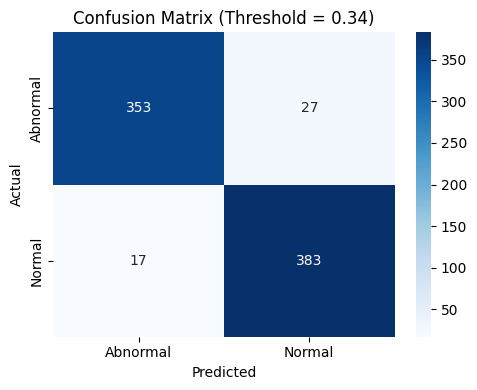

In [2]:
# model testing ::

import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === USER SETTINGS ===
model_path = r"C:\Users\Devansh\Desktop\Project Backups\Model3\LungAbnormalityDetectorThree_ModelResNet50.h5"
test_dir = r"C:\Users\Devansh\Desktop\Project Backups\LungAbnormalityDetectorDataset(PreprocessedAugmented)\Test"

IMG_SIZE = (256, 256)
BATCH_SIZE = 32
threshold = 0.34  # Based on training
class_names = ["Abnormal", "Normal"]

# === Load Model ===
model = tf.keras.models.load_model(model_path, compile=False)

# === Load Dataset ===
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='binary',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# === Predict & Evaluate ===
y_true, y_pred = [], []

# Get file paths in the same order as test_ds batches
all_file_paths = test_ds.file_paths  # tf >= 2.5
# If not available, use:
# all_file_paths = [f for subdir, _, files in os.walk(test_dir)
#                   for f in sorted(files)
#                   if f.lower().endswith(('.png','.jpg','.jpeg'))]

idx = 0
for batch_images, batch_labels in test_ds:
    probs = model.predict(batch_images).flatten()
    preds = (probs > threshold).astype(int)

    batch_size = len(batch_labels)
    for i in range(batch_size):
        img_path = all_file_paths[idx]
        bin_pred = preds[i]
        print(f"{os.path.basename(img_path):<30} → Predicted: {class_names[bin_pred]}")
        idx += 1

    y_true.extend(batch_labels.numpy().astype(int))
    y_pred.extend(preds)

# === Evaluation Metrics ===
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.tight_layout()
plt.show()
